In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import tensorflow as tf
import h5py
import pandas as pd
import seaborn as sns
from scipy import stats

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

Using TensorFlow backend.


##### Testing data

In [2]:
def get_class_data(class_name):
    global class_counts_test
    
    path_test = os.path.join(test_path, class_name)
    class_units_test = np.fromfile(path_test, dtype=int, count=-1, sep=' ', offset=0)
    units_test = np.split(class_units_test, class_units_test.size // 1080, 0) # 1080 = 3 sec * 360Hz
    class_counts_test[class_name] = class_units_test.size // 1080

    
    return units_test

In [3]:
base_path = 'C:\\cygwin\\home\\User\\1studing\\wfdb\\GettingData\\cnn_code'
test_path = os.path.join(base_path, 'data_files_test')
model_save_path = os.path.join(base_path, 'model\\cnn_model.h5')
model_weights_path = os.path.join(base_path, 'model\\cnn_model_weights.hdf5')

classes = ['N', 'LBBB', 'RBBB', 'B', 'T', 'VT', 'SVTA', 'AFIB', 'AFL', 'NOD', 'IVR', 'V']
class_mapping = {'N': 0, 'LBBB': 1, 'RBBB': 2, 'B': 3, 'T': 4, 'VT': 5, 'SVTA': 6, 'AFIB': 7, 'AFL': 8, 'NOD': 9, 'IVR': 10, 'V': 11}
class_counts_test = {'N': 0, 'LBBB': 0, 'RBBB': 0, 'B': 0, 'T': 0, 'VT': 0, 'SVTA': 0, 'AFIB': 0, 'AFL': 0, 'NOD': 0, 'IVR': 0, 'V': 0}

X_test = []
Y_test = []

for class_i in classes:
    class_units_test = get_class_data(class_i)
    Y_test  += [class_mapping[class_i]] * class_counts_test[class_i]
    X_test += class_units_test

#print(len(X_test)) #test = 7926
#print(len(Y_test)) 


7926
7926


##### Testing

In [22]:
XX_test = np.asarray(X_test)
YY_test = np.asarray(Y_test)
XX_test = XX_test.astype("float32")
YY_test = YY_test.astype("float32")

YY_test = to_categorical(YY_test, num_classes)

model_test = load_model(model_save_path)
model_test.load_weights(model_weights_path) 

BATCH_SIZE = 90

score = model_test.evaluate(XX_test, YY_test, batch_size = BATCH_SIZE, verbose=2)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

7926/1 - 17s - loss: 2.4234 - accuracy: 0.4817

Accuracy on test data: 0.48

Loss on test data: 2.18


##### Predicting

In [23]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

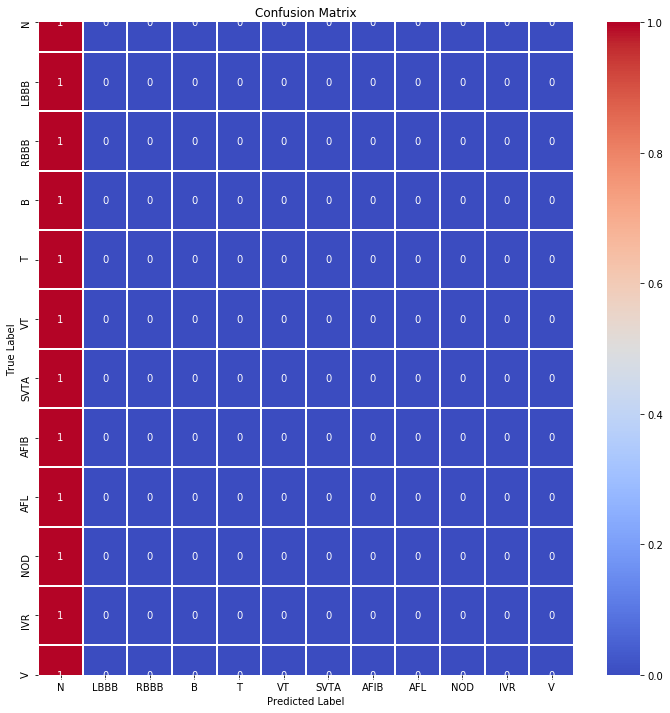


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.08      1.00      0.15         1
        3818       0.00      0.00      0.00         1
        4810       0.00      0.00      0.00         1
        5736       0.00      0.00      0.00         1
        6153       0.00      0.00      0.00         1
        6334       0.00      0.00      0.00         1
        6350       0.00      0.00      0.00         1
        6368       0.00      0.00      0.00         1
        7654       0.00      0.00      0.00         1
        7828       0.00      0.00      0.00         1
        7871       0.00      0.00      0.00         1
        7909       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.01      0.08      0.01        12
weighted avg       0.01      0.08      0.01        12



C:\Users\User\Anaconda3\envs\course_work\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#print("\n--- Confusion matrix for test data ---\n")

Y_pred_test = model_test.predict(XX_test)
# Take the class with the highest probability from the test predictions
max_Y_pred_test = np.argmax(Y_pred_test, axis=0)
max_Y_test = np.argmax(YY_test, axis=0)

LABELS = ["N", "LBBB", "RBBB", "B", "T", "VT", "SVTA", "AFIB", "AFL", "NOD", "IVR", "V"]

show_confusion_matrix(max_Y_test, max_Y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_Y_test, max_Y_pred_test))